
**Импортируем библиотеки и файлы**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=ded47f49521b8ab5d1ac2c3f461278a7fc919b635bc4b88867e177f88ee3996f
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


In [ ]:
from utils import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_path1='/content/drive/MyDrive/Colab Notebooks/private/sales/sales22-1.xlsx'
sales_path2='/content/drive/MyDrive/Colab Notebooks/private/sales/sales22-2.xlsx'
sales_path3='/content/drive/MyDrive/Colab Notebooks/private/sales/sales22-3.xlsx'
sales_path4='/content/drive/MyDrive/Colab Notebooks/private/sales/sales23-1.xlsx'
sales_path5='/content/drive/MyDrive/Colab Notebooks/private/sales/sales23-2.xlsx'
sales_path6='/content/drive/MyDrive/Colab Notebooks/private/sales/sales23-3.xlsx'
sales_path7='/content/drive/MyDrive/Colab Notebooks/private/sales/sales24-1.xlsx'
sales_path8='/content/drive/MyDrive/Colab Notebooks/private/sales/sales24-2.xlsx'
sales_path9='/content/drive/MyDrive/Colab Notebooks/private/sales/sales24-3.xlsx'

In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/private/Справочник магазина.xlsx'

In [ ]:
reference_story = pd.read_excel(file_path,header=0)

In [ ]:
sales22_1_df=pd.read_excel(sales_path1,header=0)
sales22_2_df=pd.read_excel(sales_path2,header=0)
sales22_3_df=pd.read_excel(sales_path3,header=0)
sales23_1_df=pd.read_excel(sales_path4,header=0)
sales23_2_df=pd.read_excel(sales_path5,header=0)
sales23_3_df=pd.read_excel(sales_path6,header=0)
sales24_1_df=pd.read_excel(sales_path7,header=0)
sales24_2_df=pd.read_excel(sales_path8,header=0)
sales24_3_df=pd.read_excel(sales_path9,header=0)

In [ ]:
sales22_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791659 entries, 0 to 791658
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Наименование магазина    791659 non-null  object        
 1   store_id                 791659 non-null  object        
 2   Товар                    791659 non-null  object        
 3   item_id                  791659 non-null  object        
 4   Дата                     791659 non-null  datetime64[ns]
 5   price_change_reason_grp  791659 non-null  object        
 6   Причина изменения цены   791659 non-null  object        
 7   GS, с НДС                791659 non-null  float64       
 8   NS, с НДС                791659 non-null  float64       
 9   Quantity                 791659 non-null  float64       
 10  Discount                 791659 non-null  float64       
 11  Price                    791659 non-null  object        
dtypes: datetime64[ns

In [ ]:
reference_story.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   store_id                         365 non-null    object
 1   Наименование магазина            365 non-null    object
 2   Адрес магазина                   267 non-null    object
 3   Код города                       365 non-null    object
 4   Код магазина                     365 non-null    object
 5   Код страны                       365 non-null    object
 6   Макрорегион                      365 non-null    object
 7   Наименование города              365 non-null    object
 8   Направление ПВЗ (регион)         365 non-null    object
 9   Область ПВЗ                      111 non-null    object
 10  Общая площадь                    365 non-null    object
 11  Сектор                           194 non-null    object
 12  Торговая площадь                 365

In [ ]:
reference_story.head()

,store_id,Наименование магазина,Адрес магазина,Код города,Код магазина,Код страны,Макрорегион,Наименование города,Направление ПВЗ (регион),Область ПВЗ,...,Торговая площадь,Флаг - закрыт,Флаг - логистический центр,Флаг - ПВЗ,Флаг - склад,Флаг - удален,GUID подразделения организации,GUID подразделения в 1С ЗУП,ID макрорегиона,ID подразделения организации
0,gR6QGw4Ppb0R6G7oRLIfjA==,Интернет магазин Все регионы,NaN,000000001,000000300,KZ,Интернет-магазин,Все регионы,-,NaN,...,-,0,0,0,0,0,-,-,KZ96,-
1,gP+QGw4P74wR53ELmW1+dA==,Интернет магазин Кульсары,NaN,100000011,000000213,KZ,Интернет-магазин,Кульсары,-,NaN,...,-,0,0,0,0,0,-,-,KZ96,-
2,gQWQGw4P74wR57S5cAOrtg==,Региональный склад Бишкек,NaN,100000025,000000257,KZ,Склады,Бишкек,-,NaN,...,-,1,0,0,1,0,-,-,KZ98,-
3,gR6QGw4Ppb0R6G7oRLIfjQ==,Интернет магазин Капгачай,NaN,100000045,000000301,KZ,Интернет-магазин,Капшагай,-,NaN,...,-,0,0,0,0,0,-,-,KZ96,-
4,hfAAGZngwWQR5+iQaFHpeQ==,Интернет магазин Талгар,NaN,100000046,000000270,KZ,Интернет-магазин,Талгар,-,NaN,...,-,0,0,0,0,0,-,-,KZ96,-


In [ ]:
  reference_story.describe()

,Флаг - закрыт,Флаг - логистический центр,Флаг - ПВЗ,Флаг - склад,Флаг - удален
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.504110,0.010959,0.304110,0.076712,0.019178
std,0.500669,0.104252,0.460661,0.266500,0.137339
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
sales22=pd.concat([sales22_1_df,sales22_2_df,sales22_3_df]).groupby(['store_id','item_id'],as_index=False).agg({"Quantity":"sum"})

In [ ]:
sales23=pd.concat([sales23_1_df,sales23_2_df,sales23_3_df]).groupby(['store_id','item_id'],as_index=False).agg({"Quantity":"sum"})

In [ ]:
sales24=pd.concat([sales24_1_df,sales24_2_df,sales24_3_df]).groupby(['store_id','item_id'],as_index=False).agg({"Quantity":"sum"})

In [ ]:
sales22

,store_id,item_id,Quantity
0,-,gL+QGw4P74wR5LyoXgzlCw==,75.634518
1,-,gL+QGw4P74wR5MIcm/CyjQ==,-0.671854
2,-,gL+QGw4P74wR5MIcm/CylQ==,2.662091
3,-,gL+QGw4P74wR5McN3zyqaA==,-10.551632
4,-,gM+QGw4P74wR5Uuib8stog==,22.637922
...,...,...,...
237724,uUFKNGDhyW1KX9Zl3mDqhw==,hGEAIk3YOtwR7INSS0mJ0w==,12.162605
237725,uUFKNGDhyW1KX9Zl3mDqhw==,hGEAIk3YOtwR7INSS0mJ2g==,1.734236
237726,uUFKNGDhyW1KX9Zl3mDqhw==,hGEAIk3YOtwR7INSS0mJ4Q==,-2.979945
237727,uUFKNGDhyW1KX9Zl3mDqhw==,hGEAIk3YOtwR7INSS0mJ5A==,0.602832


In [ ]:
rfc_story=reference_story.dropna()

In [ ]:
rfc_story.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 121 to 355
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   store_id                         111 non-null    object
 1   Наименование магазина            111 non-null    object
 2   Адрес магазина                   111 non-null    object
 3   Код города                       111 non-null    object
 4   Код магазина                     111 non-null    object
 5   Код страны                       111 non-null    object
 6   Макрорегион                      111 non-null    object
 7   Наименование города              111 non-null    object
 8   Направление ПВЗ (регион)         111 non-null    object
 9   Область ПВЗ                      111 non-null    object
 10  Общая площадь                    111 non-null    object
 11  Сектор                           111 non-null    object
 12  Торговая площадь                 111 no

In [ ]:
# Убираем пробелы и лишние символы
sales22["store_id"] = sales22["store_id"].astype(str).str.strip()
rfc_story["store_id"] = rfc_story["store_id"].astype(str).str.strip()

In [ ]:
ss22_df=sales22.merge(rfc_story,on='store_id',how='inner')

In [ ]:
ss22_df

,store_id,item_id,Quantity,Наименование магазина,Адрес магазина,Код города,Код магазина,Код страны,Макрорегион,Наименование города,...,Торговая площадь,Флаг - закрыт,Флаг - логистический центр,Флаг - ПВЗ,Флаг - склад,Флаг - удален,GUID подразделения организации,GUID подразделения в 1С ЗУП,ID макрорегиона,ID подразделения организации
0,hD4AIk3YOt0R6sZaIgn3Pw==,gMOQGw4P74wR5OGWxw0gdw==,-0.195732,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
1,hD4AIk3YOt0R6sZaIgn3Pw==,gMOQGw4P74wR5OGWxw0gew==,0.660039,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
2,hD4AIk3YOt0R6sZaIgn3Pw==,gMeQGw4P74wR5QjR5qOIPA==,4.298634,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
3,hD4AIk3YOt0R6sZaIgn3Pw==,gMyQGw4P74wR5S9edV8BQw==,3.005485,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
4,hD4AIk3YOt0R6sZaIgn3Pw==,gN+QGw4P74wR5g3oi8Im8w==,7.084347,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37415,hHoAIk3YOt0R7WorQ1EuTw==,hHUAIk3YOt0R7VHIzcowLQ==,-7.370830,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==
37416,hHoAIk3YOt0R7WorQ1EuTw==,hHYAIk3YOtwR7VszUmxHaQ==,-0.057450,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==
37417,hHoAIk3YOt0R7WorQ1EuTw==,hHoAIk3YOt0R7W+mwfjOcQ==,-5.782907,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==
37418,hHoAIk3YOt0R7WorQ1EuTw==,jaYAUFaNLXIR6SUe3ytApQ==,2.687818,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==


In [ ]:
ss22_df.describe()

,Quantity,Флаг - закрыт,Флаг - логистический центр,Флаг - ПВЗ,Флаг - склад,Флаг - удален
count,37420.000000,37420.000000,37420.0,37420.0,37420.0,37420.0
mean,1.009095,0.466301,0.0,1.0,0.0,0.0
std,7.008438,0.498870,0.0,0.0,0.0,0.0
min,-47.403330,0.000000,0.0,1.0,0.0,0.0
25%,-3.039180,0.000000,0.0,1.0,0.0,0.0
50%,0.751214,0.000000,0.0,1.0,0.0,0.0
75%,4.526300,1.000000,0.0,1.0,0.0,0.0
max,60.699017,1.000000,0.0,1.0,0.0,0.0


In [ ]:
ss22_df

,store_id,item_id,Quantity,Наименование магазина,Адрес магазина,Код города,Код магазина,Код страны,Макрорегион,Наименование города,...,Торговая площадь,Флаг - закрыт,Флаг - логистический центр,Флаг - ПВЗ,Флаг - склад,Флаг - удален,GUID подразделения организации,GUID подразделения в 1С ЗУП,ID макрорегиона,ID подразделения организации
0,0,10,-0.171913,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
1,0,11,-0.049806,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
2,0,14,0.469375,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
3,0,18,0.284859,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
4,0,19,0.866860,ПВЗ Алм. Иссык,"г.Есик, Алматинская, д.100 В",010000128,000000333,KZ,ПВЗ,Есик,...,78,0,0,1,0,0,c31a033c-c64b-11ea-843e-00224dd83add,3cae9663-c64d-11ea-8110-0050568de185,KZ97,hD4AIk3YOt0R6sZLwxoDPA==
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37415,100,3114,-1.195707,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==
37416,100,3117,-0.152182,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==
37417,100,3136,-0.969131,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==
37418,100,3146,0.239532,ПВЗ Кост. Аркалык БЦ Туран,"Костанайская обл., г. Аркалык, ул. Ш.Жанибека 70",010000199,000000511,KZ,ПВЗ,Аркалык,...,134,1,0,1,0,0,0d727093-6280-11ed-8477-00224dd83adc,154b2d6a-6281-11ed-8140-0050568df702,KZ97,hHcAIk3YOtwR7WKADXJwkw==


In [ ]:
sales23["store_id"] = sales23["store_id"].astype(str).str.strip()
sales24["store_id"] = sales24["store_id"].astype(str).str.strip()

In [ ]:
ss23_df=sales23.merge(rfc_story,on='store_id',how='inner')
ss24_df=sales24.merge(rfc_story,on='store_id',how='inner')

In [ ]:
ss24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42273 entries, 0 to 42272
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   store_id                         42273 non-null  object 
 1   item_id                          42273 non-null  object 
 2   Quantity                         42273 non-null  float64
 3   Наименование магазина            42273 non-null  object 
 4   Адрес магазина                   42273 non-null  object 
 5   Код города                       42273 non-null  object 
 6   Код магазина                     42273 non-null  object 
 7   Код страны                       42273 non-null  object 
 8   Макрорегион                      42273 non-null  object 
 9   Наименование города              42273 non-null  object 
 10  Направление ПВЗ (регион)         42273 non-null  object 
 11  Область ПВЗ                      42273 non-null  object 
 12  Общая площадь     

**Осознали и следующий этап построение модели**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
ss22_df["store_id"] = le.fit_transform(ss22_df["store_id"])
ss22_df["item_id"] = le.fit_transform(ss22_df["item_id"])
ss22_df["Сектор"] = le.fit_transform(ss22_df["Сектор"])
ss22_df["Макрорегион"] = le.fit_transform(ss22_df["Макрорегион"])
ss22_df["Направление ПВЗ (регион)"] = le.fit_transform(ss22_df["Направление ПВЗ (регион)"])
ss22_df["Область ПВЗ"] = le.fit_transform(ss22_df["Область ПВЗ"])

In [ ]:
for col in ["Общая площадь", "Торговая площадь"]:
    ss22_df[col] = ss22_df[col].astype(str)
    ss22_df[col] = ss22_df[col].str.replace(',', '.').str.replace(' ', '')
    ss22_df[col] = pd.to_numeric(ss22_df[col], errors="coerce")
    ss22_df[col] = ss22_df[col].fillna(ss22_df[col].median())

In [ ]:
scaler=StandardScaler()
ss22_df['Quantity']=scaler.fit_transform(ss22_df[['Quantity']])

In [ ]:
label_enc = LabelEncoder()
for col in X_train.select_dtypes(include="object").columns:
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.transform(X_test[col])

In [ ]:
X = ss22_df[[
    "store_id", "item_id", "Макрорегион", "Направление ПВЗ (регион)", "Область ПВЗ",
    "Общая площадь", "Торговая площадь", "Сектор",
    "Флаг - логистический центр", "Флаг - ПВЗ",
]]

y = ss22_df["Quantity"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(f"✅ Данных для обучения: {X_train.shape}, для теста: {X_test.shape}")

✅ Данных для обучения: (29936, 10), для теста: (7484, 10)


In [ ]:
model=xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=20, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Результаты модели:\nMAE: {mae:.4f}\nRMSE: {rmse:.4f}")

📊 Результаты модели:
MAE: 0.9431
RMSE: 1.2792


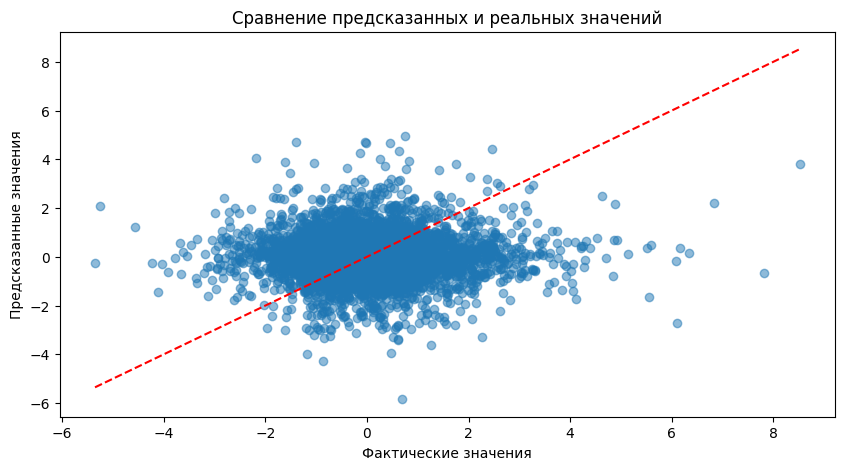

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение предсказанных и реальных значений")
plt.show()


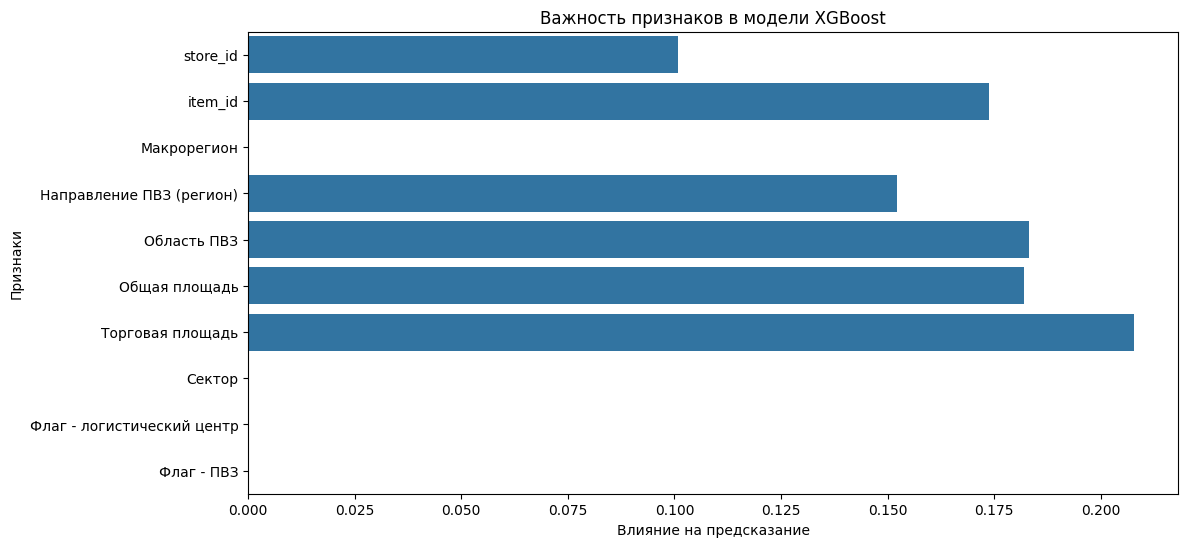

In [ ]:
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Важность признаков в модели XGBoost")
plt.xlabel("Влияние на предсказание")
plt.ylabel("Признаки")
plt.show()


модель за 24

In [ ]:
le=LabelEncoder()
ss24_df["store_id"] = le.fit_transform(ss24_df["store_id"])
ss24_df["item_id"] = le.fit_transform(ss24_df["item_id"])
ss24_df["Сектор"] = le.fit_transform(ss24_df["Сектор"])
ss24_df["Макрорегион"] = le.fit_transform(ss24_df["Макрорегион"])
ss24_df["Направление ПВЗ (регион)"] = le.fit_transform(ss24_df["Направление ПВЗ (регион)"])
ss24_df["Область ПВЗ"] = le.fit_transform(ss24_df["Область ПВЗ"])

In [ ]:
for col in ["Общая площадь", "Торговая площадь"]:
    # Приводим к строковому типу (чтобы работал `.str.replace()`)
    ss24_df[col] = ss24_df[col].astype(str)
    # Заменяем запятые и пробелы
    ss24_df[col] = ss24_df[col].str.replace(',', '.').str.replace(' ', '')

    # Преобразуем в float
    ss24_df[col] = pd.to_numeric(ss24_df[col], errors="coerce")

    # Заполняем NaN медианой
    ss24_df[col] = ss24_df[col].fillna(ss24_df[col].median())

In [ ]:
scaler=StandardScaler()
ss22_df['Quantity']=scaler.fit_transform(ss22_df[['Quantity']])

In [ ]:
label_enc = LabelEncoder()
for col in X_train.select_dtypes(include="object").columns:
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.transform(X_test[col])

In [ ]:
X = ss24_df[[
    "store_id", "item_id", "Макрорегион", "Направление ПВЗ (регион)", "Область ПВЗ",
    "Общая площадь", "Торговая площадь", "Сектор",
    "Флаг - логистический центр", "Флаг - ПВЗ",
]]

y = ss24_df["Quantity"]

In [ ]:
X_test,X_train,y_test,y_train=train_test_split(X,y,train_size=0.2,random_state=42)

In [ ]:
print(f"✅ Данных для обучения: {X_train.shape}, для теста: {X_test.shape}")

✅ Данных для обучения: (33819, 10), для теста: (8454, 10)


In [ ]:
model=xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=20, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Результаты модели:\nMAE: {mae:.4f}\nRMSE: {rmse:.4f}")

📊 Результаты модели:
MAE: 5.8195
RMSE: 7.8308


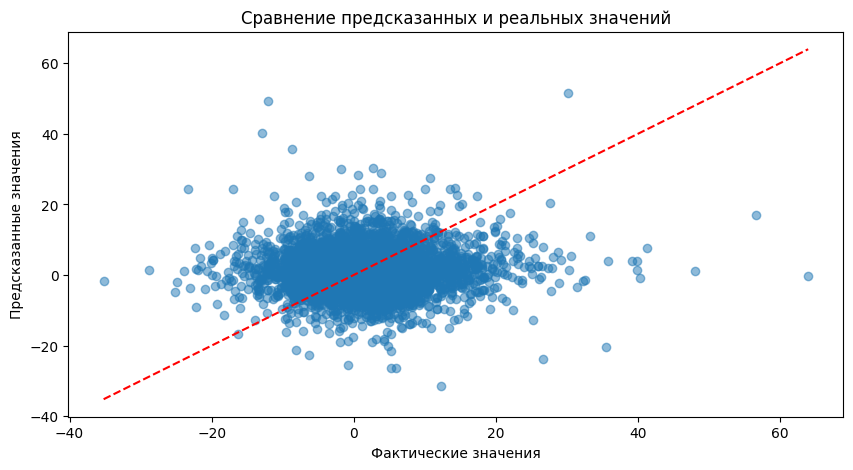

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение предсказанных и реальных значений")
plt.show()

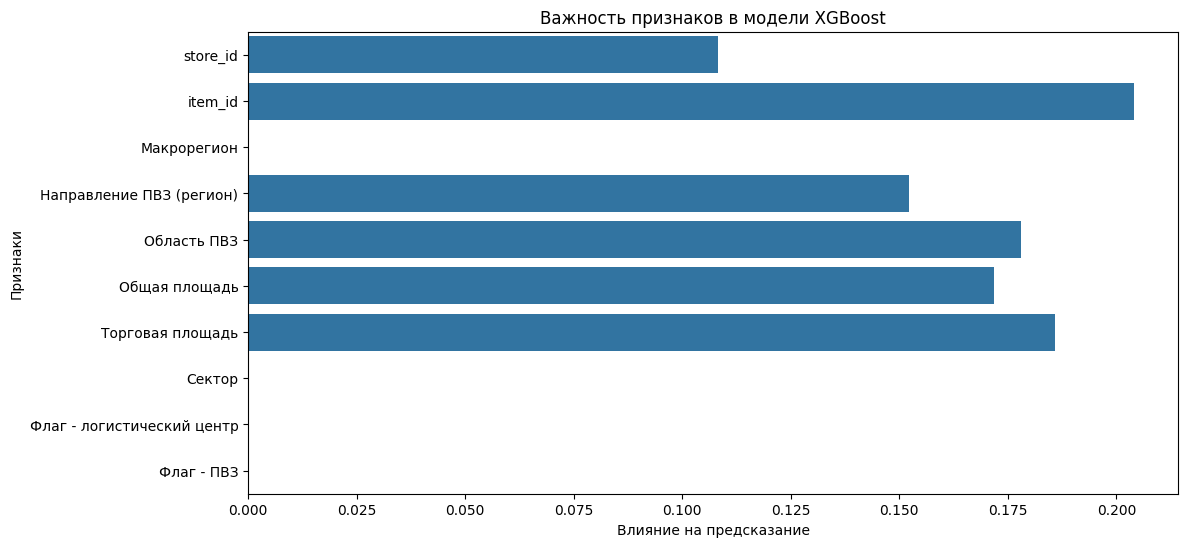

In [ ]:
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Важность признаков в модели XGBoost")
plt.xlabel("Влияние на предсказание")
plt.ylabel("Признаки")
plt.show()
